<a href="https://colab.research.google.com/github/polyuki/Python-Practice/blob/main/%E5%A4%87%E4%BB%BD3-0925.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# 读取CSV文件
data = pd.read_csv("Tel.csv")

# 查看数据的前几行
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
# 获取列名
column_names = data.columns

# 打印列名
print(column_names)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
import numpy as np

# 将空字符串替换为NaN
data['tenure'].replace(' ', np.nan, inplace=True)
data['MonthlyCharges'].replace(' ', np.nan, inplace=True)
data['TotalCharges'].replace(' ', np.nan, inplace=True)

# 将NaN填充为中位数
median_tenure = data['tenure'].median()
median_monthly_charges = data['MonthlyCharges'].median()
median_total_charges = data['TotalCharges'].median()

data['tenure'].fillna(median_tenure, inplace=True)
data['MonthlyCharges'].fillna(median_monthly_charges, inplace=True)
data['TotalCharges'].fillna(median_total_charges, inplace=True)

In [ ]:
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})
# 列名和映射字典的对应关系
binary_columns = ['Partner', 'Dependents', 'PhoneService',  'PaperlessBilling','Churn']
mapping_dict = {'Yes': 1, 'No': 0}

# 使用循环对多列应用映射
for column in binary_columns:
    data[column] = data[column].map(mapping_dict)


In [ ]:
def map_binary_columns(data, columns):
    for column in columns:
        data[column] = data[column].apply(lambda x: 1 if 'Yes' in str(x) else 0)

# 列名列表
binary_columns = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# 调用函数处理所有二元分类列
map_binary_columns(data, binary_columns)

In [ ]:
data = pd.get_dummies(data, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [ ]:
print(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [ ]:
# 计算相关性矩阵
correlation_matrix = data.corr()

# 提取'Churn'列与其他列的相关性
correlation_with_churn = correlation_matrix['Churn'].abs().sort_values(ascending=False)

# 打印相关性信息
print(correlation_with_churn)


Churn                                      1.000000
Contract_Month-to-month                    0.405103
tenure                                     0.352229
InternetService_Fiber optic                0.308020
Contract_Two year                          0.302253
PaymentMethod_Electronic check             0.301919
InternetService_No                         0.227890
MonthlyCharges                             0.193356
PaperlessBilling                           0.191825
Contract_One year                          0.177820
OnlineSecurity                             0.171226
TechSupport                                0.164674
Dependents                                 0.164221
SeniorCitizen                              0.150889
Partner                                    0.150448
PaymentMethod_Credit card (automatic)      0.134302
InternetService_DSL                        0.124214
PaymentMethod_Bank transfer (automatic)    0.117937
PaymentMethod_Mailed check                 0.091683
OnlineBackup

<ipython-input-8-7659094cf891>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [ ]:
print(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [ ]:
import pandas as pd

# 从CSV文件中读取数据到数据框
Tel = pd.read_csv("Tel.csv")

# 选择特征列和目标变量
X = data[['tenure', 'Contract_Month-to-month', 'InternetService_Fiber optic',
          'Contract_Two year','PaymentMethod_Electronic check', 'InternetService_No', 'MonthlyCharges', 'PaperlessBilling',
          'Contract_One year', 'OnlineSecurity', 'TechSupport', 'SeniorCitizen', 'Partner',  'PaymentMethod_Credit card (automatic)',
          'InternetService_DSL', 'PaymentMethod_Bank transfer (automatic)']]
y = data['Churn']


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()



In [ ]:
# 导入必要的库
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练逻辑回归模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 打印模型性能指标
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.8002839564600095
Confusion Matrix:
 [[1385  154]
 [ 268  306]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.67      0.53      0.59       574

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import classification_report

# 计算分类报告
class_report = classification_report(y_test, y_pred)

# 打印分类报告
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.67      0.53      0.59       574

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



- **Precision（精确度）**：对于类别0，精确度为0.84，表示在所有模型预测为类别0的样本中，有84%的样本是真正的类别0。对于类别1，精确度为0.67，表示在所有模型预测为类别1的样本中，有67%的样本是真正的类别1。精确度衡量了模型在预测正类别时的准确性。

- **Recall（召回率）**：对于类别0，召回率为0.90，表示在所有真正的类别0样本中，有90%被正确地预测为类别0。对于类别1，召回率为0.53，表示在所有真正的类别1样本中，只有53%被正确地预测为类别1。召回率衡量了模型发现真正类别的能力。

- **F1-Score（F1分数）**：F1分数是精确度和召回率的调和平均值。对于类别0，F1分数为0.87，对于类别1，F1分数为0.59。F1分数考虑了精确度和召回率，可用于综合评估模型性能。

- **Support（支持数量）**：支持是每个类别的真实样本数量。在类别0下有1539个样本，而在类别1下有574个样本。

- **Accuracy（准确度）**：整体准确度为0.80，表示模型正确分类的样本占总样本数的80%。

- **Macro Avg和Weighted Avg**：这两个行提供了宏平均和加权平均的指标。宏平均计算了所有类别的平均值，每个类别具有相同的权重。加权平均则考虑了每个类别的样本数量，因此在不平衡的数据集中更有意义。


1. **模型性能总结**：首先，总结模型的性能。你可以说模型的整体准确度为0.80，这意味着模型在测试集上正确分类的样本占总样本数的80%。

2. **类别性能**：模型在类别0（没有解约）上表现良好，精确度为0.84，召回率为0.90，F1分数为0.87。这表示模型在识别非解约客户方面效果很好。

3. **挑战**：提及模型在类别1（解约客户）上的性能相对较低。模型的精确度为0.67，召回率为0.53，F1分数为0.59。这意味着模型在识别解约客户方面存在一些挑战。你可以强调召回率的重要性，因为错过解约客户可能会对业务产生负面影响。

4. **改进措施**：根据模型的结果，提出改进措施。例如，你可以建议改进特征工程，添加更多相关的特征，或者尝试不同的机器学习模型。此外，你可以建议业务部门采取客户挽留策略，以降低解约率。

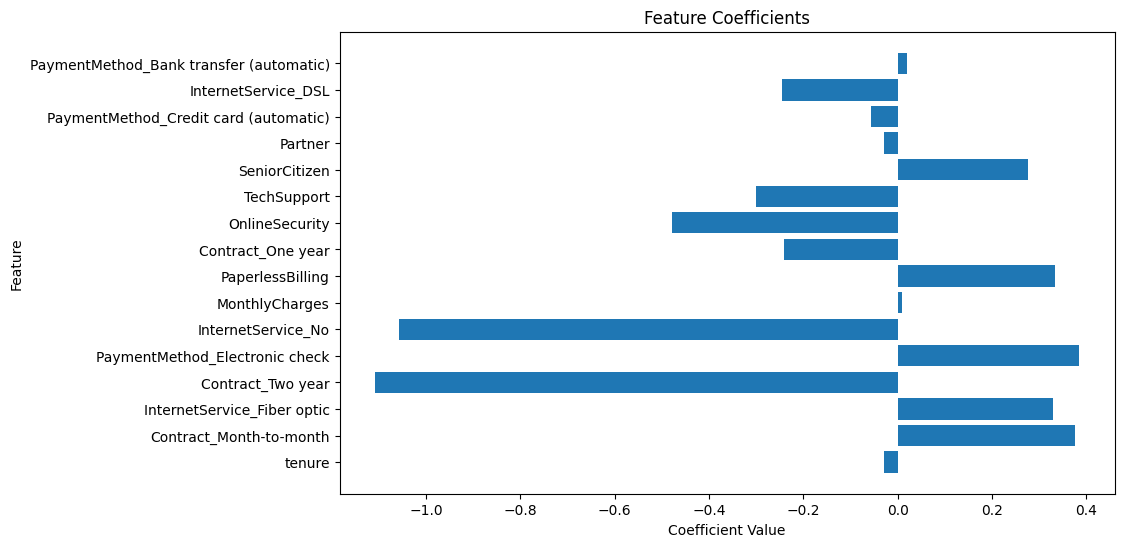

In [ ]:
import matplotlib.pyplot as plt

# 获取特征系数
coef = model.coef_[0]

# 获取特征名称
feature_names = X.columns

# 绘制条形图
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coef)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.show()


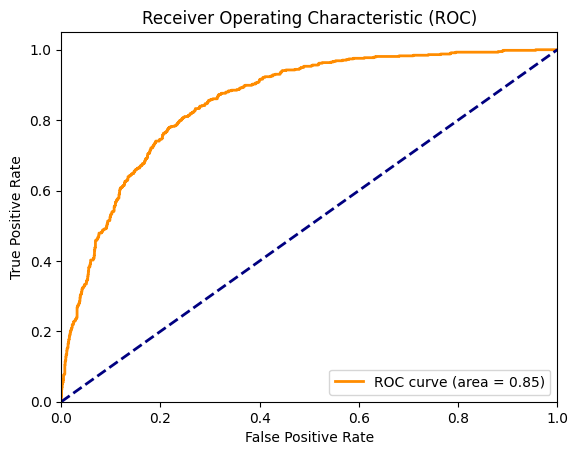

In [ ]:
from sklearn.metrics import roc_curve, auc

# 计算ROC曲线
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
